In [61]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
from qiskit import transpile
from math import pi
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='dc31b03f027a9bd3feacb5714def6389cd678db34850e8cb6eb42805ecf2539fb88053c8adcf6224cba9c7cb1bca69fb9f0b3e11b2209c774fe42628b743f79f'
)

# Or save your credentials on disk.
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', token='dc31b03f027a9bd3feacb5714def6389cd678db34850e8cb6eb42805ecf2539fb88053c8adcf6224cba9c7cb1bca69fb9f0b3e11b2209c774fe42628b743f79f')

Defino en primer lugar una función _Nmod(x) que calcula el modulo congruente entre el numero N el cual queremos factorizar a un numero entero entre 2 y N-2. Para luego encontrar el periodo de la función _Nmodx(r) = x^r mod N, y veririfcar que el periodo sea par.

4


In [62]:
def count_bits(n):
    return len(bin(n)) - 2

def _Nmodx(N, x, r):
    n=count_bits(N)
    qc = QuantumCircuit(n)
    qc.x(4)
    qc.cx(0,5)
    qc.cx(0,6)
    qc.cx(1,4)
    qc.cx(1,6)
    for i in range(4,8):
        qc.ccx(0,1,i)
    gate = qc.to_gate()
    gate.name = "7^x mod 15"
    return gate


def _7mod15():
        
    qc = QuantumCircuit(8)
    qc.x(4)
    qc.cx(0,5)
    qc.cx(0,6)
    qc.cx(1,4)
    qc.cx(1,6)
    for i in range(4,8):
        qc.ccx(0,1,i)
    gate = qc.to_gate()
    gate.name = "7^x mod 15"
    return gate

In [63]:
def QFT(n):
    qft_circ = QuantumCircuit(n)
    for i in range(n-1, -1, -1):
        qft_circ.h(i)
        
        for j in range(i - 1, -1, -1): 
            qft_circ.cp(pi/(2 ** (i - j)), j, i)
 
        
    for i in range(n // 2):
        qft_circ.swap(i, n - i - 1)
    gate = qft_circ.to_gate()
    gate.name = "QFT" + str(n)
    return  gate

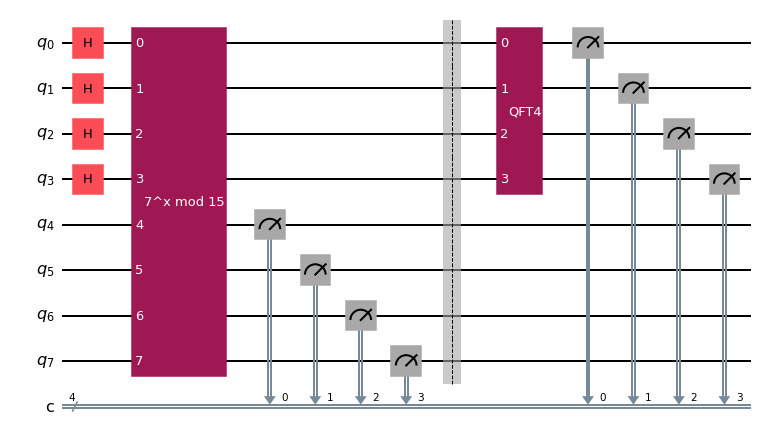

In [68]:
qc = QuantumCircuit(8,4)
qc.h(range(4))
qc.append(_7mod15(), range(8))
qc.measure(range(4,8),range(4))
qc.barrier(range(8))
qc.append(QFT(4), range(4))
qc.measure(range(4), range(4))
qc.draw(output = 'mpl')

{'0100': 231, '0000': 261, '1000': 284, '1100': 248}


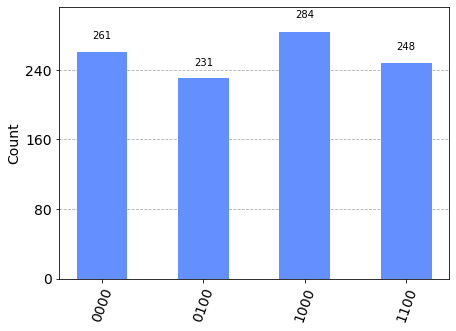

In [65]:
backend = Aer.get_backend("qasm_simulator")
new_circuit = transpile(circ, backend)
job = backend.run(new_circuit)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [66]:
# con esto sabemos que 4 es raiz cuadrada ya que el mcd de 4 8 12 es 4
# sabiendo esto podemos calcular los factores primos de la siguiente manera:

import math

primer_factor = math.gcd(4-1, 15)
segundo_factor = math.gcd(4+1, 15)
print("factores primos:", primer_factor, segundo_factor)

factores primos: 3 5
